## Solution to the second question of the Data Science Mini Project 

#### Alireza Hashemi, March 30th

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Load dataframes

In [2]:
MT = pd.read_csv("MT_cleaned.csv",low_memory=False)
VT = pd.read_csv("VT_cleaned.csv",low_memory=False)

#### Q1) The proportion of traffic stops in MT involving male drivers

In [4]:
male_prop = MT.driver_gender.value_counts()['M']/len(MT.index)
print("The proportion of traffic stops in MT involving male drivers: "+str(male_prop))

The proportion of traffic stops in MT involving male drivers: 0.6749749732765495


#### Q2) Factor increase in a traffic stop arrest likelihood in MT from OOS plates

In [5]:
oos_arrested = len(MT[MT.out_of_state==True][MT.is_arrested==True].index)
oos_total = len(MT[MT.out_of_state==True].index)
oos_arrest_ratio = oos_arrested/oos_total

is_arrested = len(MT[MT.out_of_state==False][MT.is_arrested==True].index)
is_total = len(MT[MT.out_of_state==False].index)
is_arrest_ratio =  is_arrested/is_total
factor_oos = oos_arrest_ratio/is_arrest_ratio
print(factor_oos)

1.2095129351452942


#### Q2) a. Chi-Squared traffic stop arrest test statistic
(You should run the previous cell first)

In [6]:
from scipy.stats import chisquare
chisquare(f_obs=[1, factor_oos], f_exp=[1,1]).statistic

0.04389566999319627

#### Q3) The proportion of traffic stops in MT involving speeding violations

In [8]:
speed_prop = MT.violation.str.contains("Speed").sum()/len(MT[MT.violation.notna()].index)
print("The proportion of traffic stops in MT involving speeding violations: "+ str(speed_prop))

The proportion of traffic stops in MT involving speeding violations: 0.6581580398644923


#### Q4) Factor increase in traffic stop DUI likelihood in MT over VT:

In [9]:
MT_DUI_likelihood = MT.violation.str.contains("DUI").sum() / len(MT[MT.violation.notna()].index)
VT_DUI_likelihood = VT.violation.str.contains("DUI").sum() / len(VT[VT.violation.notna()].index)
DUI_ratio = MT_DUI_likelihood / VT_DUI_likelihood
print(DUI_ratio)

4.054943765214862


#### Q5) The average manufacture year of vehicles stopped in MT in 2020

In [11]:
stops_with_year = MT[['stop_date', 'vehicle_year']]
stops_with_year.vehicle_year = pd.to_numeric(stops_with_year.vehicle_year, errors='coerce')
stops_with_year = stops_with_year[stops_with_year.vehicle_year.notna()]
stops_with_year.stop_date = pd.to_datetime(stops_with_year.stop_date, errors='coerce').dt.year
stops_with_year = stops_with_year[stops_with_year.stop_date.notna()]

years = stops_with_year.stop_date.unique()
avgs = [np.mean(stops_with_year[stops_with_year.stop_date==year].vehicle_year.values) for year in years]
errors = [np.std(stops_with_year[stops_with_year.stop_date==year].vehicle_year.values)/2 for year in years]

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(years, avgs)

querry = 2020
print("The predicted average manufacture year of vehicles stopped in MT in 2020: "+str(slope*2020+intercept))
print("P-value of linear regression: "+str(p_value))

The predicted average manufacture year of vehicles stopped in MT in 2020: 2008.8431659593393
P-value of linear regression: 5.609148253703464e-08


A bit of visualization, can be skipped:

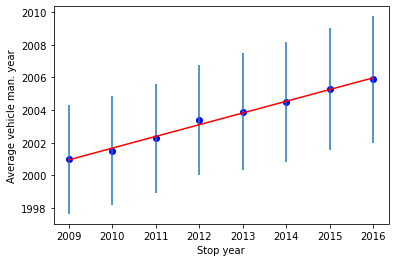

In [12]:
import matplotlib.pyplot as plt

plt.scatter(years, avgs, c='blue')
plt.errorbar(years,avgs, errors, fmt='none')
plt.plot(years, slope*years+intercept, c='red')
plt.xlabel("Stop year")
plt.ylabel("Average vehicle man. year");

#### Q6) The difference in the total number of stops that occurred between min and max hours in both MT and VT:

In [13]:
stops_with_time = MT.stop_time[MT.stop_time.notna()].values
MT_hours = np.array([int(stop[:2]) for stop in stops_with_time])
stops_with_time = VT.stop_time[VT.stop_time.notna()].values
VT_hours = np.array([int(stop[:2]) for stop in stops_with_time])

MT_hours, MT_n_stops = np.unique(MT_hours, return_counts=True)
VT_hours, VT_n_stops = np.unique(VT_hours, return_counts=True)

print("The difference in the total number of stops that occurred between min and max hours in both MT: "+str(np.max(MT_n_stops)-np.min(MT_n_stops)))
print("The difference in the total number of stops that occurred between min and max hours in both MT: "+str(np.max(VT_n_stops)-np.min(VT_n_stops)))

The difference in the total number of stops that occurred between min and max hours in both MT: 75478
The difference in the total number of stops that occurred between min and max hours in both MT: 26052


A bit of visualization, can be skipped:

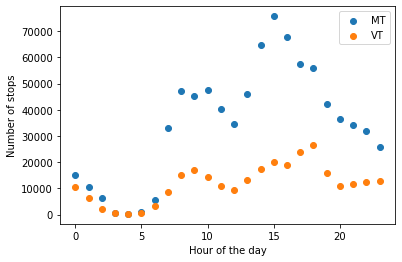

In [15]:
import matplotlib.pyplot as plt

plt.scatter(MT_hours, MT_n_stops, label='MT')
plt.scatter(VT_hours, VT_n_stops, label='VT')
plt.xlabel("Hour of the day")
plt.ylabel("Number of stops")
plt.legend();

#### Q7) The area in sq. km of the largest county in MT 

The provided dataset does not contain enough information for this value to be determined and I am going to explain why different approaches would fail:

1) One may think we can calculate this based on the number of stops in each county. This is not true because we should keep in mind the Bayesian inference. The counties do not necesserily have the same amount of roads, drivers, police officers and we can not say if the violation frequency is the same in all counties. (Tried and got wrong results)

2) One way might be to find the county which has the most difference in longitude and latitude values. This doesn't work either because different counties do not have homogenous road distribution. (Tried and got wrong results)

3) Another way would be to import geographical libraries or use Google or Wikipedia libraries to search for this value online. Which I do not think passes the sanity check.